## This project is based on kaggle dataset which is aimed at determining the calorie value for different individuals using  training features

### The problem statement is a regrssion one, so Random Forest algorithm is adopted for this project

In [144]:
# importing of dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [145]:
# import datasets
train = pd.read_csv("C:\\Users\\USER\\Desktop\\screened data\\exercise.csv")
target = pd.read_csv("C:\\Users\\USER\\Desktop\\screened data\\calories.csv")

In [146]:
# join the two dataframes
exercise = pd.merge(train, target, on = "User_ID", how = "inner")

In [147]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [148]:
exercise.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

#### dataframe columns are all numerical except the categorical "Gender" column

In [149]:
exercise.isna().any()

User_ID       False
Gender        False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
Calories      False
dtype: bool

#### the dataset columns are all numerical except the "Gender" column that is categorical

### Exploratory Data Analysis

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

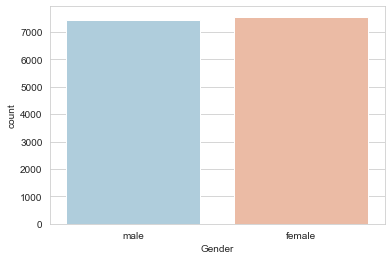

In [151]:
sns.set_style("whitegrid")
sns.countplot("Gender", data = exercise, palette = "RdBu_r")

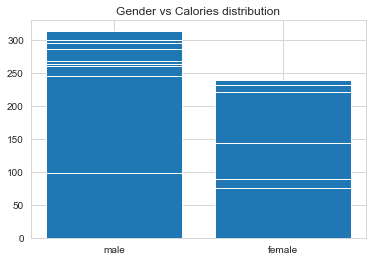

In [152]:
plt.bar("Gender", "Calories", data=exercise)
plt.title("Gender vs Calories distribution")
plt.show()

In [153]:
exercise.Age.value_counts()

20    512
21    497
22    489
26    452
25    435
24    426
23    411
27    396
28    390
29    379
32    370
31    339
35    327
30    325
33    320
38    311
34    285
37    283
36    279
39    276
40    260
44    259
42    257
41    252
43    250
46    233
45    233
52    225
47    223
50    220
48    219
54    217
49    208
55    204
53    201
59    198
51    197
56    190
63    182
58    182
61    181
62    180
57    177
64    176
60    172
65    169
73    167
71    163
67    162
70    154
68    150
66    147
79    147
69    145
74    142
76    139
72    137
78    133
77    130
75    117
Name: Age, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Calories distribution')

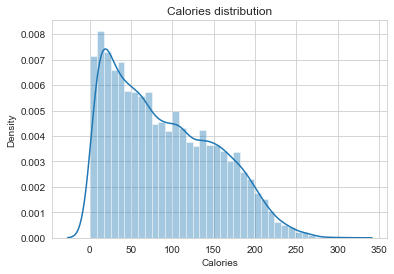

In [155]:
sns.distplot(exercise["Calories"])
plt.title("Calories distribution")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age-Weight distribution')

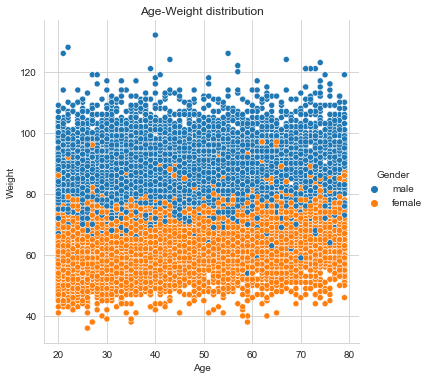

In [156]:
sns.relplot("Age", "Weight", hue ="Gender", data=exercise)
plt.title("Age-Weight distribution")

Text(0.5, 1.0, 'Relationship plot')

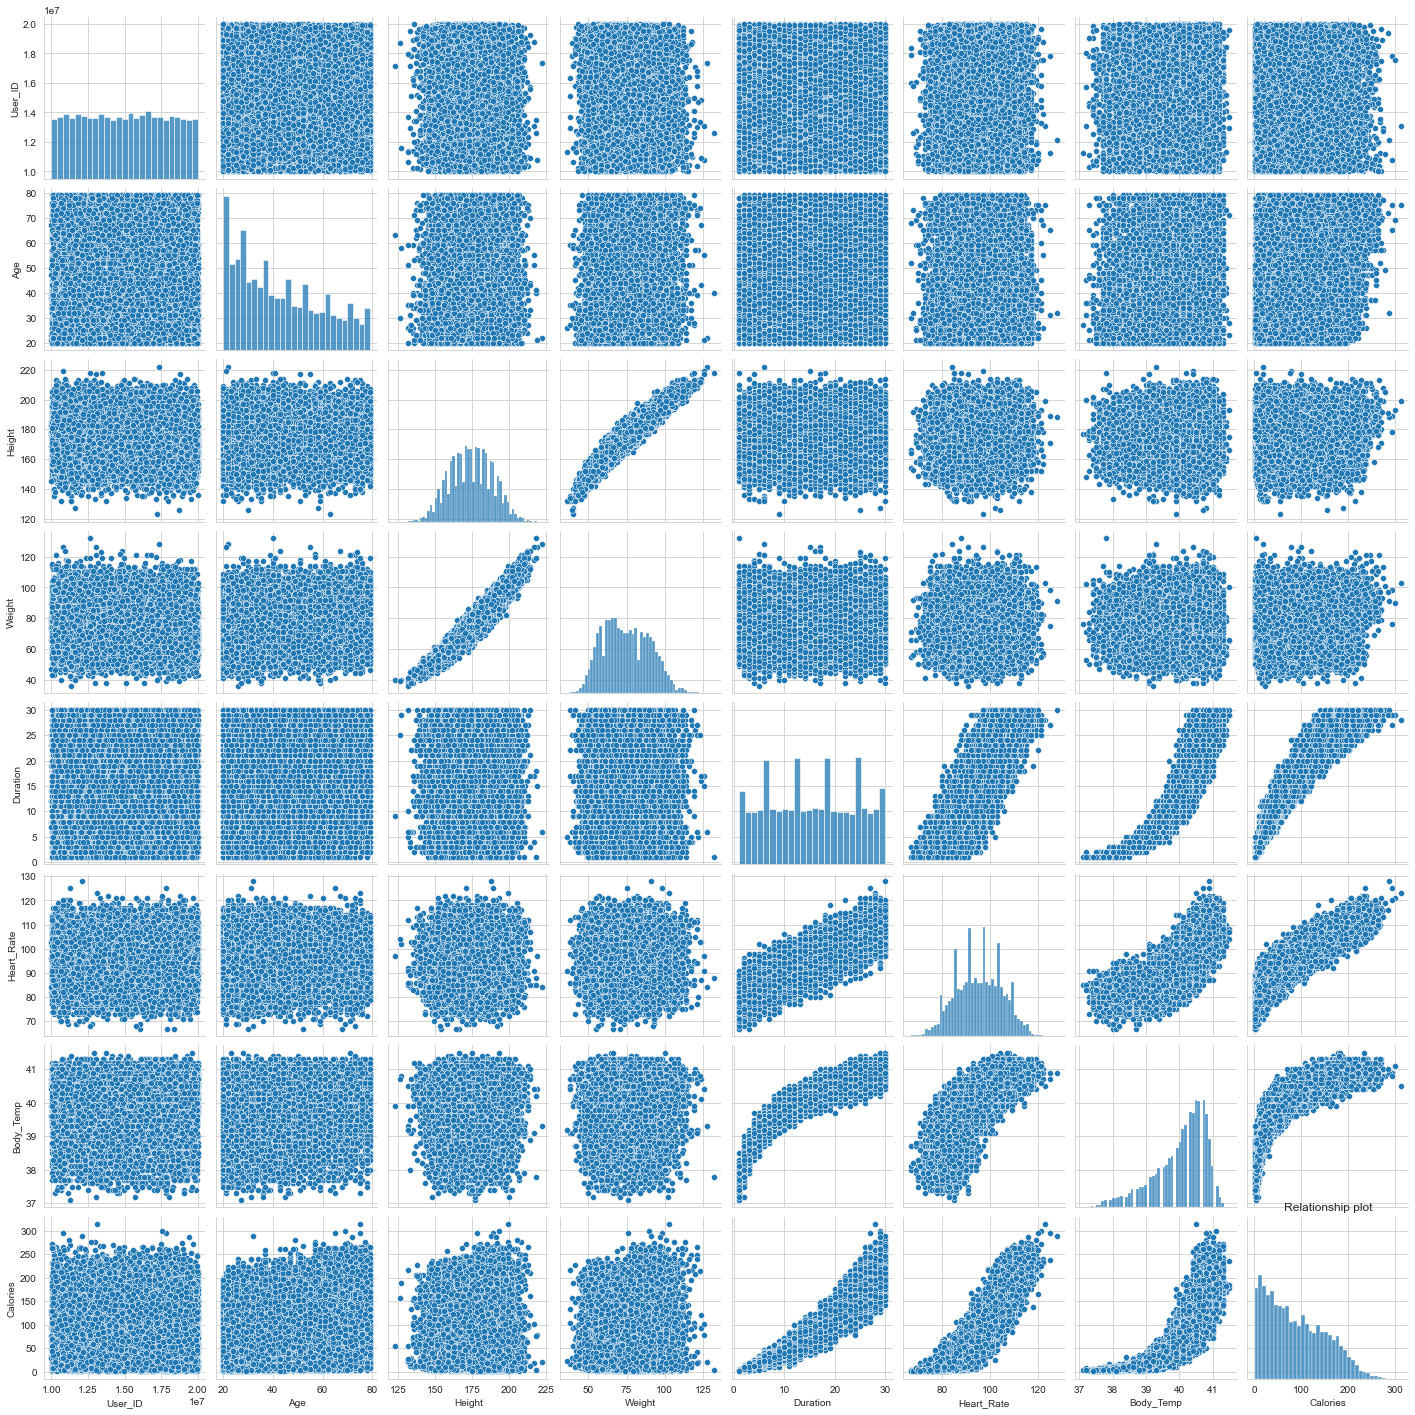

In [157]:
sns.pairplot(exercise)
plt.title("Relationship plot")

Text(0.5, 1.0, 'Correlation heatmap')

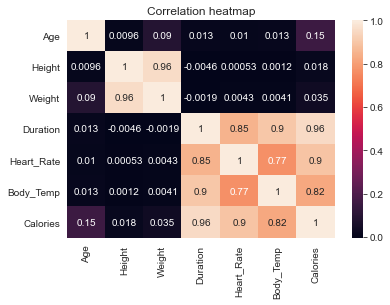

In [158]:
Correlation = exercise.drop("User_ID", axis=1).corr()
sns.heatmap(Correlation, xticklabels=Correlation.columns, yticklabels=Correlation.columns, annot = True)
plt.title("Correlation heatmap")

In [164]:
# to determine the correlated features from the heatmap

def correlation(dataset,threshold):
    col_corr = set()
    
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [166]:
corr_features = correlation(exercise.drop(["User_ID"], axis=1), 0.7)
corr_features

{'Body_Temp', 'Calories', 'Heart_Rate', 'Weight'}

#### the listed features are highly correlated

### Feature engineering

In [167]:
# one-hot-encoding the Age column

add_columns = pd.get_dummies(exercise["Gender"])

exercise.join(add_columns)

exercise.drop(["Gender"], axis=1, inplace=True)

exercise.columns

exercise = exercise.join(add_columns)

exercise


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,1,0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,1,0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,1,0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,0,1


In [168]:
# assigning features to variables

x = exercise.drop(["User_ID", "Calories"], axis=1)

y = exercise["Calories"]


In [169]:
# train-test-split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [170]:
model = RandomForestRegressor(n_estimators=10,random_state=0)

In [171]:
model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [172]:
preds = model.predict(x_test)

In [173]:
MAE = mean_absolute_error(y_test, preds)
MAE

2.2068

In [174]:
MSE = mean_squared_error(y_test, preds)
MSE

12.492408888888889

In [175]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,preds)
R2

0.9968670578536226

### Hyperparameter tuning using GridSearchCV

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
estimators = range(1,51)
print(estimators)

range(1, 51)


In [178]:
param_grid = dict(n_estimators=estimators)
print(param_grid)

{'n_estimators': range(1, 51)}


In [179]:
grid = GridSearchCV(model, param_grid, cv=10, scoring="r2")

In [180]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             param_grid={'n_estimators': range(1, 51)}, scoring='r2')

In [181]:
grid.best_estimator_

RandomForestRegressor(n_estimators=50, random_state=0)

In [182]:
grid.score(x_test,y_test)

0.9975016374704565

In [183]:
grid.best_params_

{'n_estimators': 50}

In [184]:
grid.best_score_

0.9974537683043362

#### From the GridSearchCV operation, we can deduce that Random Forest model would perform best with an n_estimators value of 50 and the random_state set at 0